In [1]:
# reference: https://www.geeksforgeeks.org/opencv-facial-landmarks-and-face-detection-using-dlib-and-opencv/

In [2]:
from imutils import face_utils 
import numpy as np 
import argparse 
import imutils 
import dlib 
import cv2 
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist

In [3]:
detector = dlib.get_frontal_face_detector() 
predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat") 

In [4]:
images = cv2.imread("./samples/1652a2e7-ed2c-4cf8-8594-c8ea305f2a9e.png") 
images = imutils.resize(images, width = 500)
images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)

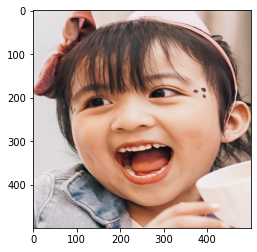

In [5]:
plt.imshow(images)

In [6]:
rects = detector(images, 0)
rects,len(rects)

(rectangles[[(95, 95) (405, 405)]], 1)

In [7]:
rect = rects[0]
rect

rectangle(95,95,405,405)

In [8]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [9]:
(lStart,lEnd),(rStart,rEnd)

((42, 48), (36, 42))

In [10]:
shape = predictor(images, rect)
shape = face_utils.shape_to_np(shape)
leftEye = shape[lStart:lEnd]
rightEye = shape[rStart:rEnd]

In [11]:
leftEye,rightEye

(array([[267, 199],
        [282, 184],
        [304, 184],
        [329, 191],
        [307, 197],
        [285, 200]]),
 array([[127, 216],
        [141, 203],
        [160, 199],
        [182, 210],
        [163, 215],
        [143, 217]]))

In [12]:
leftEyeHull = cv2.convexHull(leftEye)
rightEyeHull = cv2.convexHull(rightEye)

In [13]:
leftEye_coord = cv2.boundingRect(leftEyeHull)
rightEye_coord = cv2.boundingRect(rightEyeHull)

In [14]:
images.shape,leftEye_coord

((500, 500, 3), (267, 184, 63, 17))

In [15]:
a,b,c,d = leftEye_coord[1],leftEye_coord[1]+leftEye_coord[3],leftEye_coord[0],leftEye_coord[0]+leftEye_coord[2]
border = 20

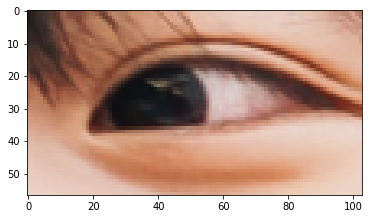

In [16]:
leftEyeImg = images[a-border:b+border,c-border:d+border]
plt.imshow(leftEyeImg)

In [17]:
copy_img = images.copy()
cv2.drawContours(copy_img, [leftEyeHull], -1, (0, 255, 0), 5);

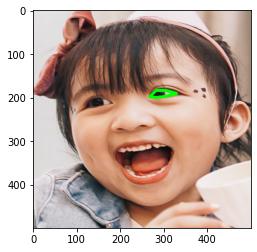

In [18]:
plt.imshow(copy_img)